### **Description:**

We create a stock-flow model in Vensim, where:

1. **Both input and output parameters** initially take deterministic values.  
2. **One input parameter** is then replaced with a randomly generated value following a normal distribution (RND).  

Both versions of the model (with deterministic and RND inputs) are run in Vensim, and the results are saved as CSV files.

Next, we save the Vensim models and **run them again using PySD**. As part of the experiment, we pass the RND-generated input parameter from the Vensim model into the PySD run using the **`params=` argument**. 

### **Issue:**
We expect the PySD model to produce the same output as the corresponding Vensim model, but **the results are different**. 

### **Objective:**
We want to understand **why** the outputs from the PySD and Vensim models do not match, and how we can modify the PySD run to generate the same output as the Vensim calculations.

importing the essential libraries

In [1]:
import numpy as np
import pandas as pd
from pysd import *
import matplotlib.pyplot as plt

reading and running vensim stock-flow model with constant parameters

In [2]:
vmodel = pysd.read_vensim("Basic_model_with_demand_variation.mdl")
model_df= vmodel.run()

Following picture shows the model structure, and it is based on Sterman's basic stock management structure

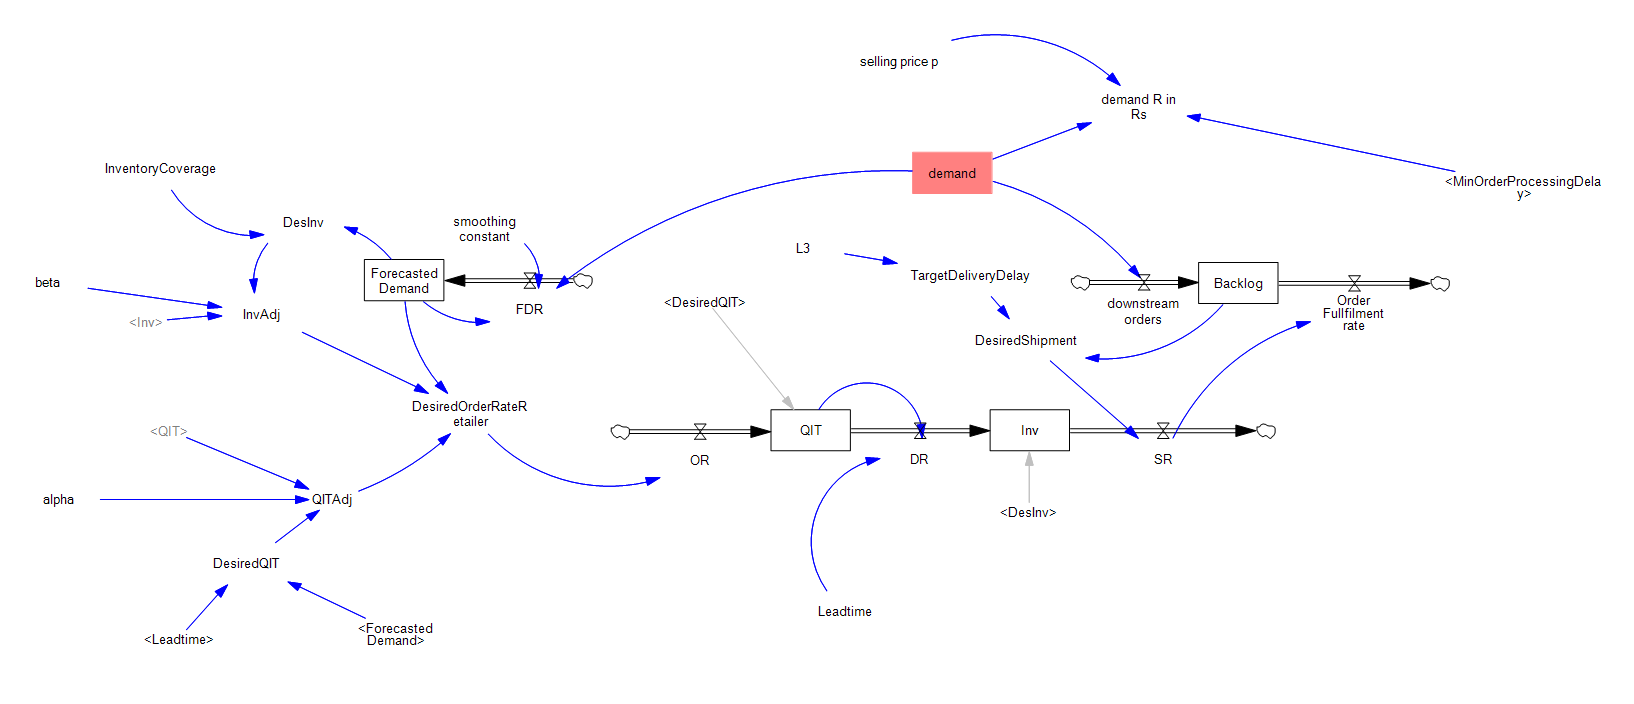

In [3]:
model_df[['demand', 'Forecasted Demand','Backlog']] 

,demand,Forecasted Demand,Backlog
time,,,
0.0,100,100.0,200.0
1.0,100,100.0,200.0
2.0,100,100.0,200.0
3.0,100,100.0,200.0
4.0,100,100.0,200.0
...,...,...,...
361.0,100,100.0,200.0
362.0,100,100.0,200.0
363.0,100,100.0,200.0


The Vensim run data for constant parameters has been loaded and matches the model run values generated by the PySD run above.

In [4]:
constant_demand_data =pd.read_csv("basic_vensim_model_data - constant_demand.csv")
constant_demand_data

,Time (Day),Backlog : constant_demand,demand : constant_demand,Forecasted Demand : constant_demand,Inv : constant_demand,QIT : constant_demand
0,0,200,100,100,200,400
1,1,200,100,100,200,400
2,2,200,100,100,200,400
3,3,200,100,100,200,400
4,4,200,100,100,200,400
...,...,...,...,...,...,...
361,361,200,100,100,200,400
362,362,200,100,100,200,400
363,363,200,100,100,200,400
364,364,200,100,100,200,400


checking if PySD model run (model_df) generates same model output as vensim model run (constant_Demand_data)

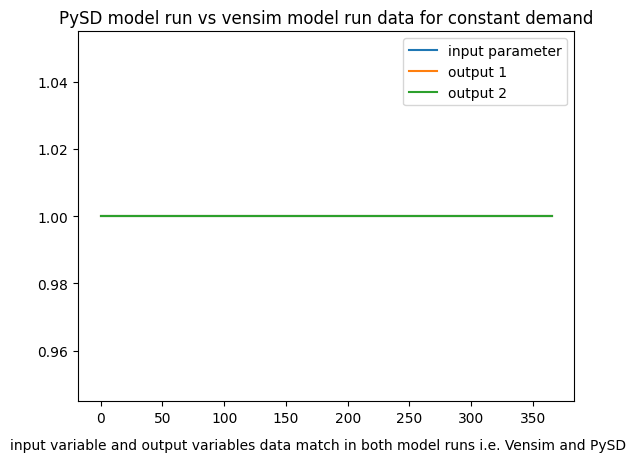

In [5]:
plt.plot(model_df['demand']==constant_demand_data["demand : constant_demand"], label = 'input parameter')
plt.plot(model_df['Forecasted Demand']==constant_demand_data["Forecasted Demand : constant_demand"], label = 'output 1')
plt.plot(model_df['Backlog']==constant_demand_data["Backlog : constant_demand"], label = 'output 2')
plt.legend(loc= "best")
plt.title("PySD model run vs vensim model run data for constant demand")
caption="input variable and output variables data match in both model runs i.e. Vensim and PySD"
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# Experiment

Let's assign or change the input parameter (demand) and observe the results of other parameters

The RN_demand_data has been obtained from vensim run by changing input parameter (demand) to a Random Normal equation 

In [6]:
#data from the csv file obtained from vensim model run
RN_demand_data = pd.read_csv("basic_vensim_model_data - RN_demand.csv")
RN_demand_data

,Time (Day),Backlog : RN_demand,demand : RN_demand,Forecasted Demand : RN_demand,Inv : RN_demand,QIT : RN_demand
0,0,200.000,100.0000,100.000,200.000,400.000
1,1,200.000,100.0000,100.000,200.000,400.000
2,2,200.000,100.0000,100.000,200.000,400.000
3,3,200.000,100.0000,100.000,200.000,400.000
4,4,200.000,100.0000,100.000,200.000,400.000
...,...,...,...,...,...,...
361,361,200.499,98.4422,100.298,199.982,402.095
362,362,199.830,100.6130,100.133,200.377,401.207
363,363,200.160,99.4805,100.173,200.576,400.725
364,364,200.184,98.5053,100.155,200.694,400.372


The Vensim run data for constant parameters has been loaded and matches the model run values generated by the PySD run above

In [7]:
#giving parameter input by csv file
model_RN_demand = vmodel.run(params={"demand" : RN_demand_data["demand : RN_demand"]})
model_RN_demand[['demand', 'Forecasted Demand','Backlog']]

e:\sd_model_env\.venv\Lib\site-packages\pysd\py_backend\model.py:1118: UserWarning: Replacing a constant value with a time-dependent value. The value will be interpolated over time.
  warnings.warn(


,demand,Forecasted Demand,Backlog
time,,,
0.0,100.0000,100.000000,200.000000
1.0,100.0000,100.000000,200.000000
2.0,100.0000,100.000000,200.000000
3.0,100.0000,100.000000,200.000000
4.0,100.0000,100.000000,200.000000
...,...,...,...
361.0,98.4422,99.919582,199.291520
362.0,100.6130,99.802988,199.043742
363.0,99.4805,99.871098,199.556398


checking if PySD model run (model_RN_demand) generates same model output as vensim model run (RN_Demand_data)

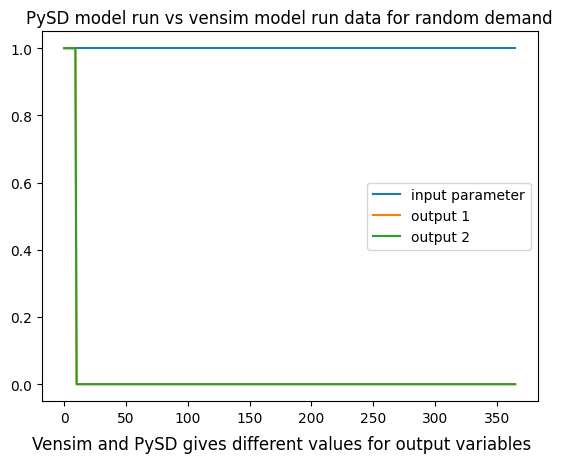

In [8]:
plt.plot(model_RN_demand['demand']==RN_demand_data["demand : RN_demand"], label = 'input parameter')
plt.plot(model_RN_demand['Forecasted Demand']==RN_demand_data["Forecasted Demand : RN_demand"], label = 'output 1')
plt.plot(model_RN_demand['Backlog']==RN_demand_data["Backlog : RN_demand"], label = 'output 2')
plt.legend(loc= "best")
plt.title("PySD model run vs vensim model run data for random demand")
caption="Vensim and PySD gives different values for output variables"
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

both the outputs **are not matching** with that of vensim model run ouput data